# Data pre-processing and analysis 1

In [4]:
import numpy as np
import tensorflow as tf
import math
import logging
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import plotly_express as px

c:\ProgramData\Anaconda3\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\ProgramData\Anaconda3\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\ProgramData\Anaconda3\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\ProgramData\Anaconda3\envs\mle_tf\lib\site-packages\tensorflow\pyth

In [5]:
all_df = pd.read_csv(r'./hour.csv', index_col=False)
all_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
day_cnt = all_df['cnt'].groupby(all_df['dteday']).sum()
day_cnt

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64

In [7]:
all_df.drop('instant',axis=1,inplace=True)
all_df.drop('casual',axis=1,inplace=True)
all_df.drop('registered',axis=1,inplace=True)
all_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [8]:
all_df.isnull().any(axis = 0)

dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
cnt           False
dtype: bool

In [9]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 1.9+ MB


In [10]:
all_df.isnull().sum(axis = 0)/all_df.shape[0]

dteday        0.0
season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

In [11]:
all_df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [12]:
all_df['dteday'].value_counts()

2011-01-01    24
2012-04-03    24
2012-04-28    24
2012-04-29    24
2012-04-30    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: dteday, Length: 731, dtype: int64

season           AxesSubplot(0.125,0.712609;0.168478x0.167391)
yr            AxesSubplot(0.327174,0.712609;0.168478x0.167391)
mnth          AxesSubplot(0.529348,0.712609;0.168478x0.167391)
hr            AxesSubplot(0.731522,0.712609;0.168478x0.167391)
holiday          AxesSubplot(0.125,0.511739;0.168478x0.167391)
weekday       AxesSubplot(0.327174,0.511739;0.168478x0.167391)
workingday    AxesSubplot(0.529348,0.511739;0.168478x0.167391)
weathersit    AxesSubplot(0.731522,0.511739;0.168478x0.167391)
temp              AxesSubplot(0.125,0.31087;0.168478x0.167391)
atemp          AxesSubplot(0.327174,0.31087;0.168478x0.167391)
hum            AxesSubplot(0.529348,0.31087;0.168478x0.167391)
windspeed      AxesSubplot(0.731522,0.31087;0.168478x0.167391)
cnt                  AxesSubplot(0.125,0.11;0.168478x0.167391)
dtype: object

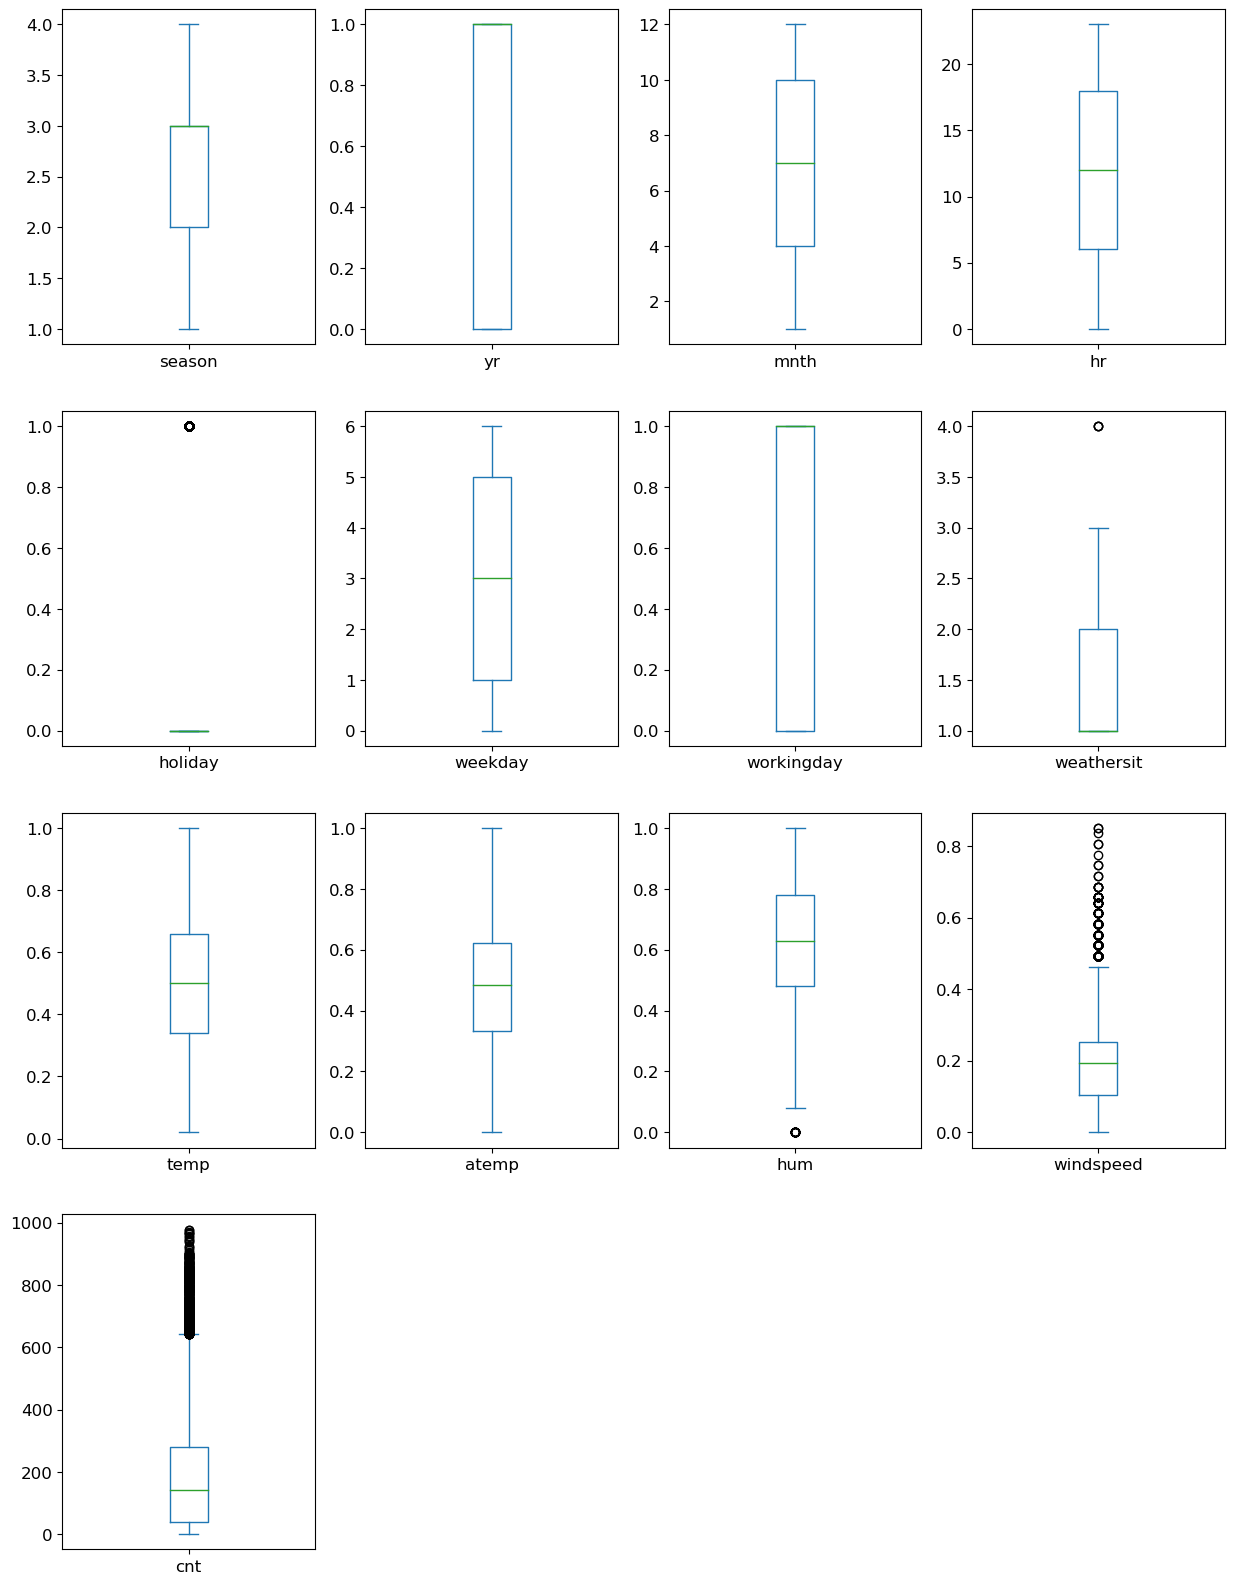

In [13]:
data_mean = all_df.iloc[:,:]
data_mean.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False,fontsize=12,figsize=(15,20))

<AxesSubplot:>

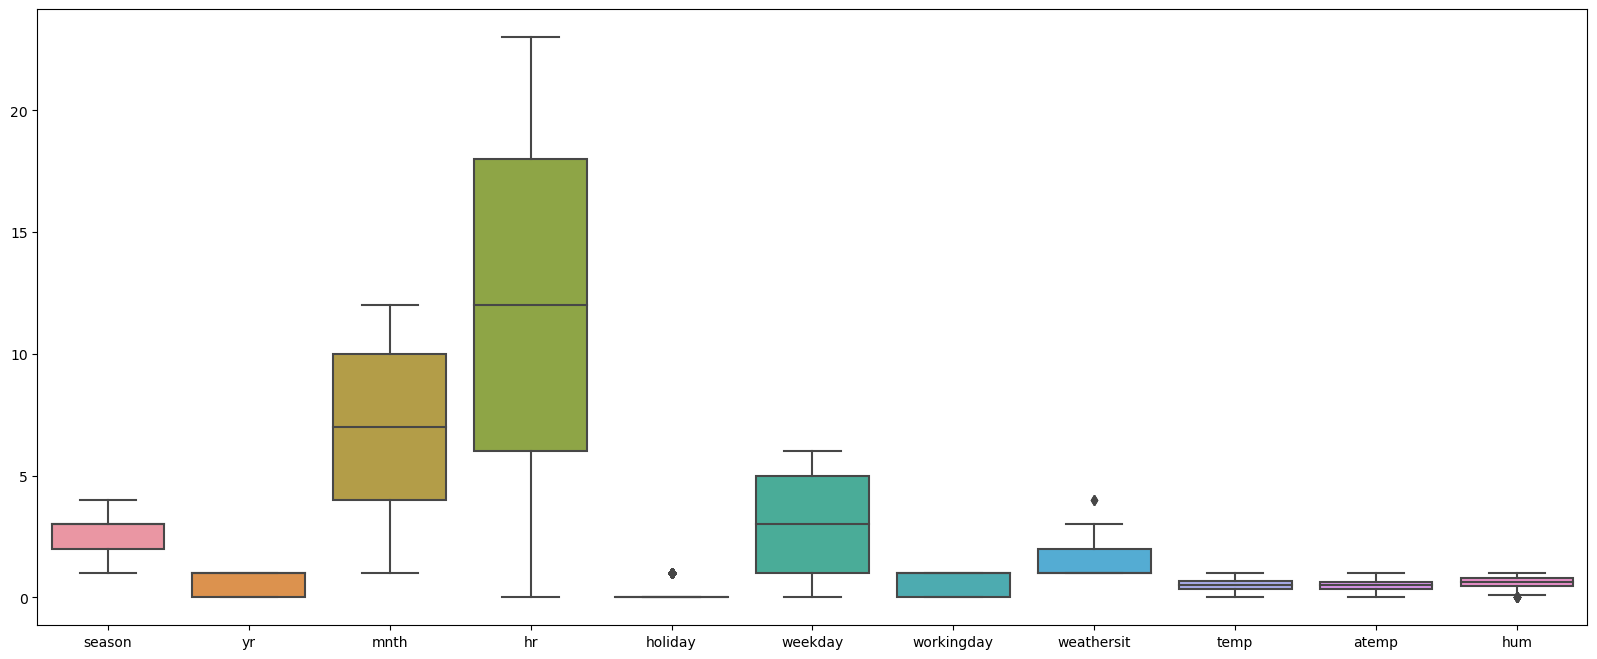

In [14]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=all_df.iloc[:, 1:12],ax=ax)

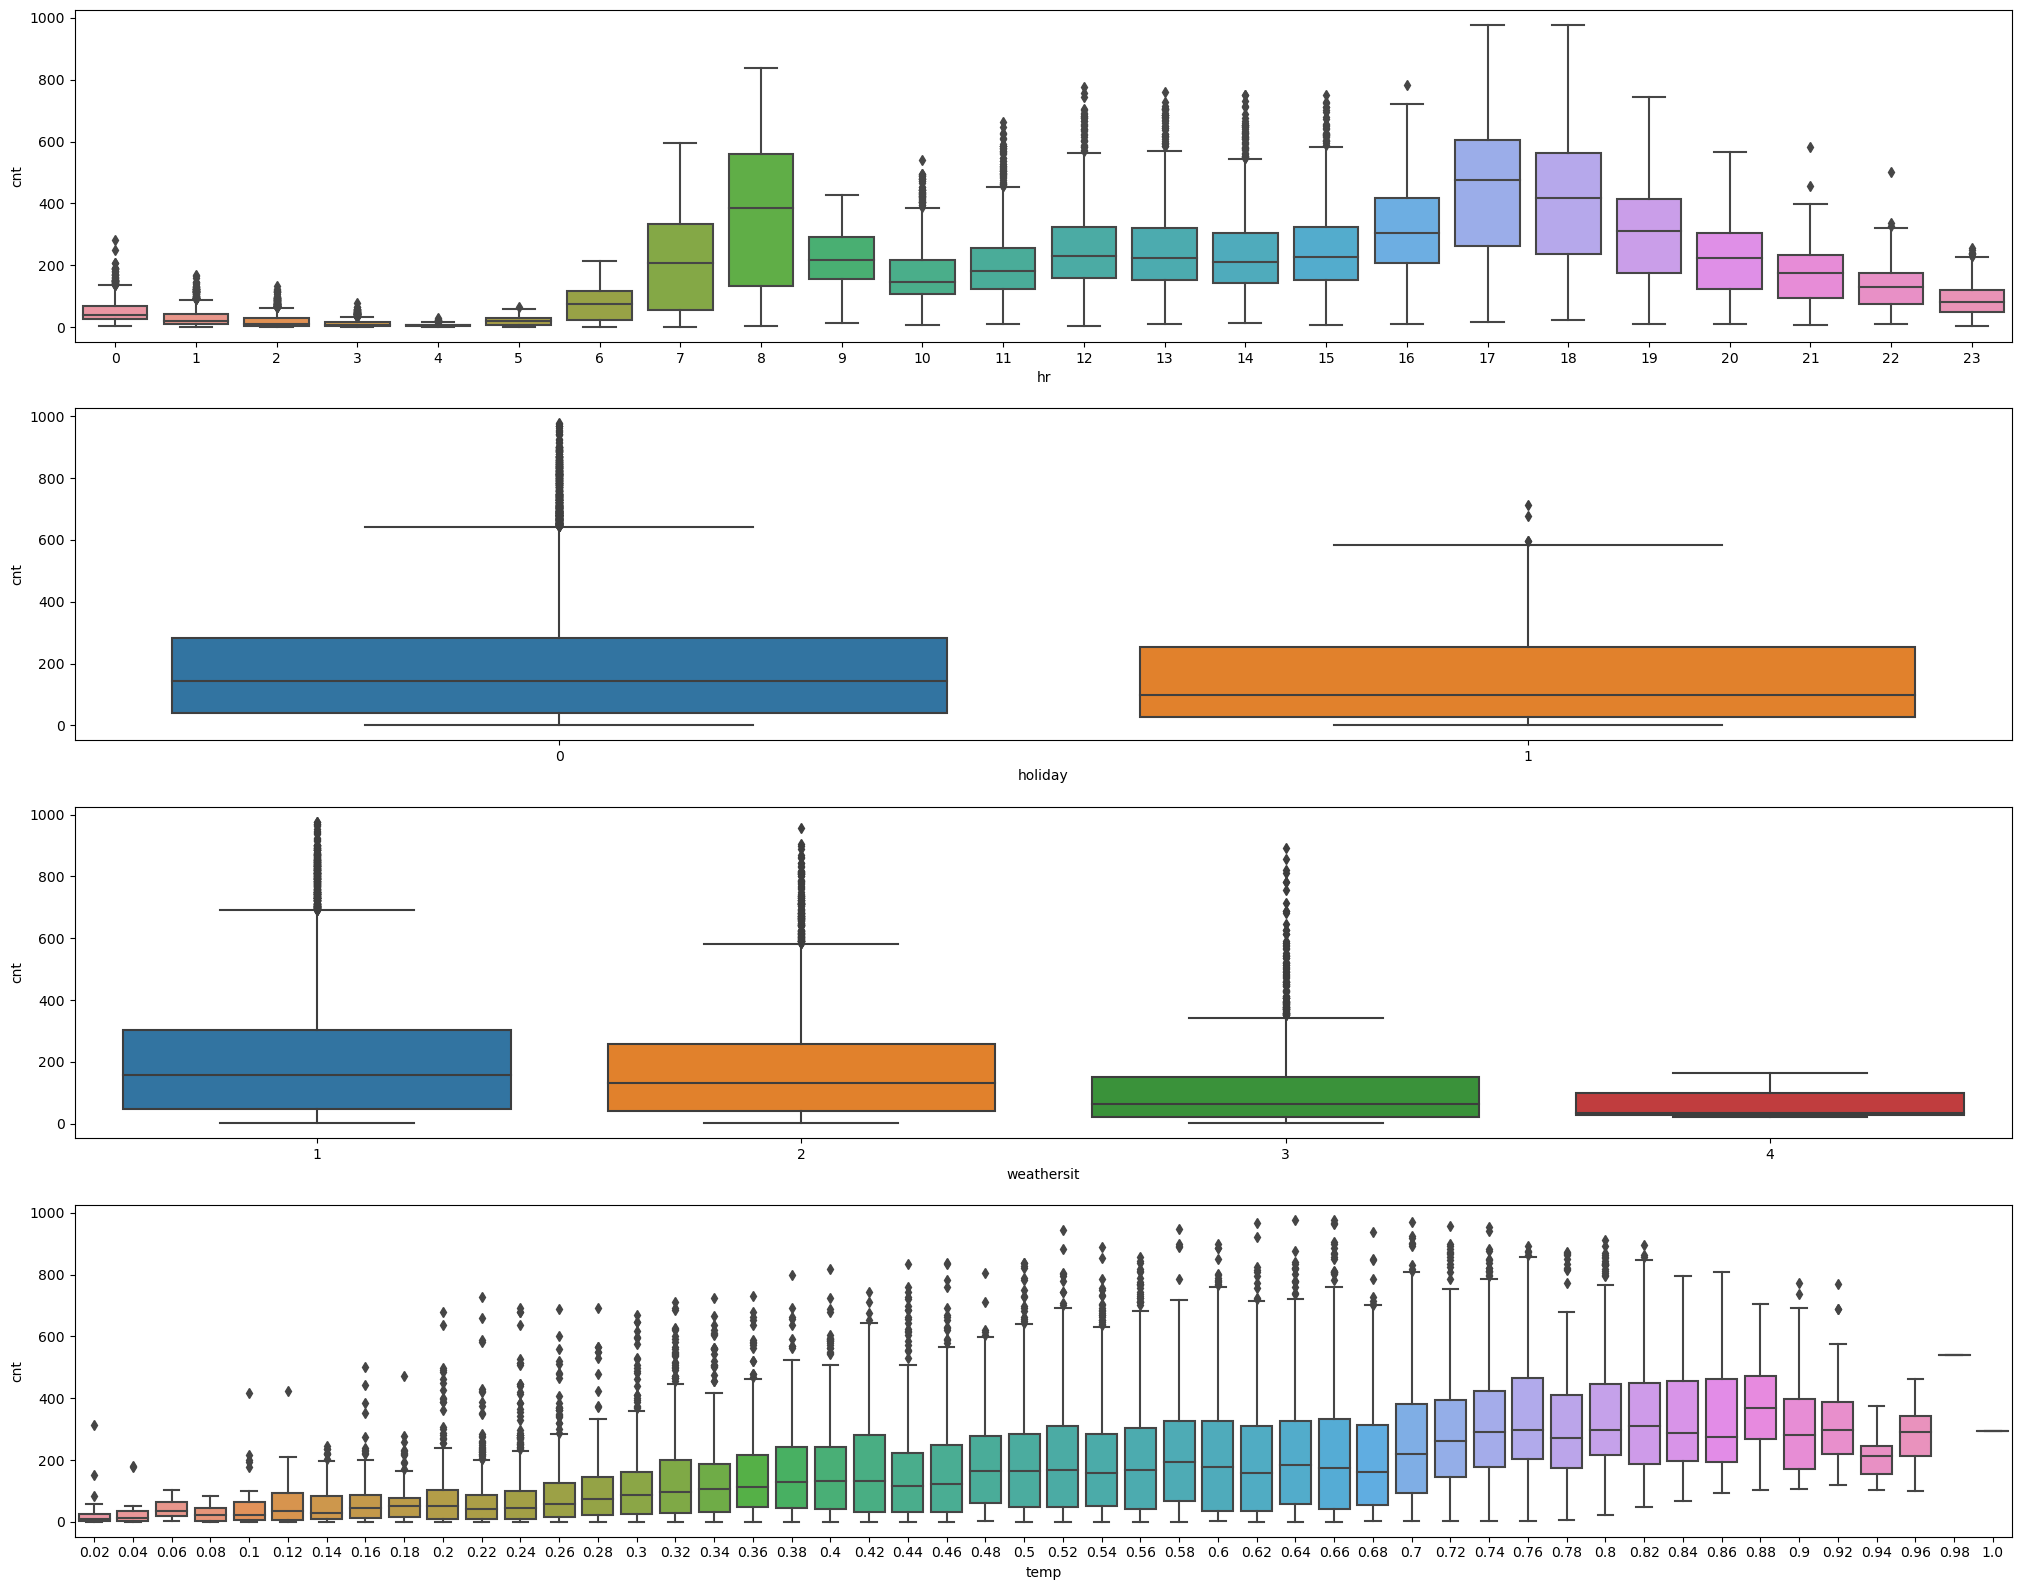

In [15]:
plt.figure(figsize=(25,25))

plt.subplot(5, 1, 1)
_ = sns.boxplot(y='cnt', x= 'hr', data=all_df)

plt.subplot(5, 1, 2)
_ = sns.boxplot( y='cnt', x= 'holiday', data=all_df)

plt.subplot(5, 1, 3)
_ = sns.boxplot(y='cnt', x= 'weathersit', data=all_df)

plt.subplot(5, 1, 4)
_ = sns.boxplot(y='cnt', x= 'temp', data=all_df)

# plt.subplot(5, 1, 5)
# _ = sns.boxplot(y='cnt', x= 'seasonDes', data=all_df)

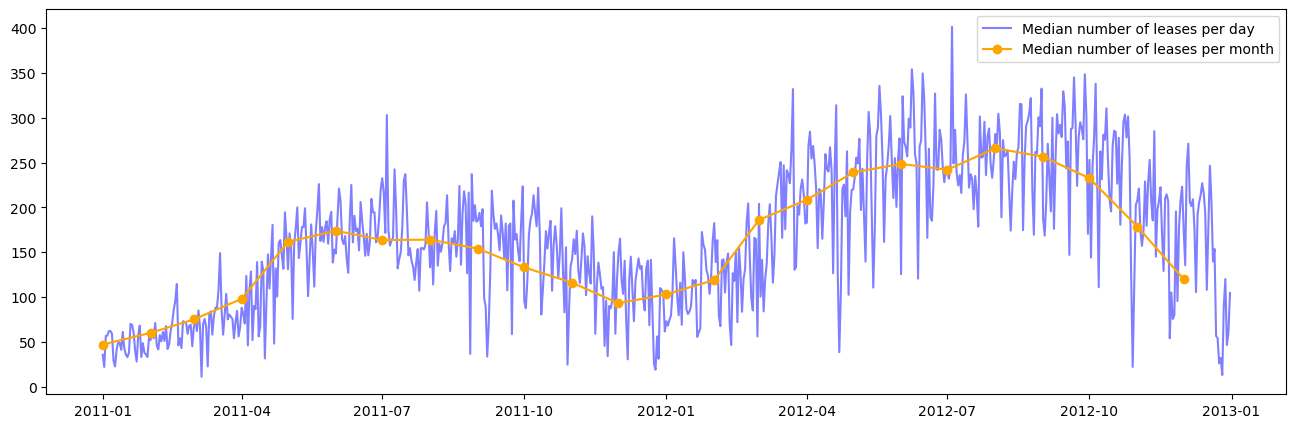

In [16]:
all_df['dteday'] = pd.to_datetime(all_df['dteday'])
all_df['year_month'] = all_df.dteday.dt.strftime('%Y-%m')
group_date = all_df.groupby('dteday')['cnt'].median()
group_month = all_df.groupby('year_month')['cnt'].median()
group_month.index = pd.to_datetime(group_month.index)
plt.figure(figsize=(16,5))
plt.plot(group_date.index, group_date.values, '-', color = 'b', label = 'Median number of leases per day', alpha=0.5)
plt.plot(group_month.index, group_month.values, '-o', color='orange', label = 'Median number of leases per month')
plt.legend()
plt.show()

# Data pre-processing and analysis 2

In [17]:
all_df['clear'] = np.where((all_df['weathersit'] == 1),1,0)
all_df['mist+cloud'] = np.where((all_df['weathersit'] == 2),1,0)
all_df['lightSnowRain'] = np.where((all_df['weathersit'] == 3),1,0)
all_df['terrible'] = np.where((all_df['weathersit'] == 4),1,0)

In [18]:



# temp : Normalized temperature in Celsius. The values are divided to 41 (max)
# comfortable 17-25 :  HOT  temp>25 -> temp>0.61   COLD  temp <17 -> temp<0.41
all_df['hot'] = np.where((all_df['temp'] >0.61),1,0)
all_df['comfortable'] = np.where(((all_df['temp'] <=0.61) & (all_df['temp'] >=0.41)),1,0)
all_df['cold'] = np.where((all_df['temp'] <0.41),1,0)

#dayTime
conditions = [((all_df['hr'] >= 0)&(all_df['hr'] <= 5)), ((all_df['hr'] > 5)&(all_df['hr'] <= 12)), 
              ((all_df['hr'] > 12)&(all_df['hr'] <= 18))]
choices = [0,1,2]
all_df['dayTime'] = np.select(conditions, choices, default= 3)
#season
# dict_season = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
# all_df['seasonDes'] = all_df['season'].map(dict_season)


In [19]:
# dummy_feature = ['season']
# for each in dummy_feature:
#     dummies = pd.get_dummies(all_df[each],prefix=each, drop_first=False)
#     all_df = pd.concat([all_df, dummies],axis=1)

drop_list = ['dteday','hr', 'year_month']
data = all_df.drop(drop_list, axis=1)

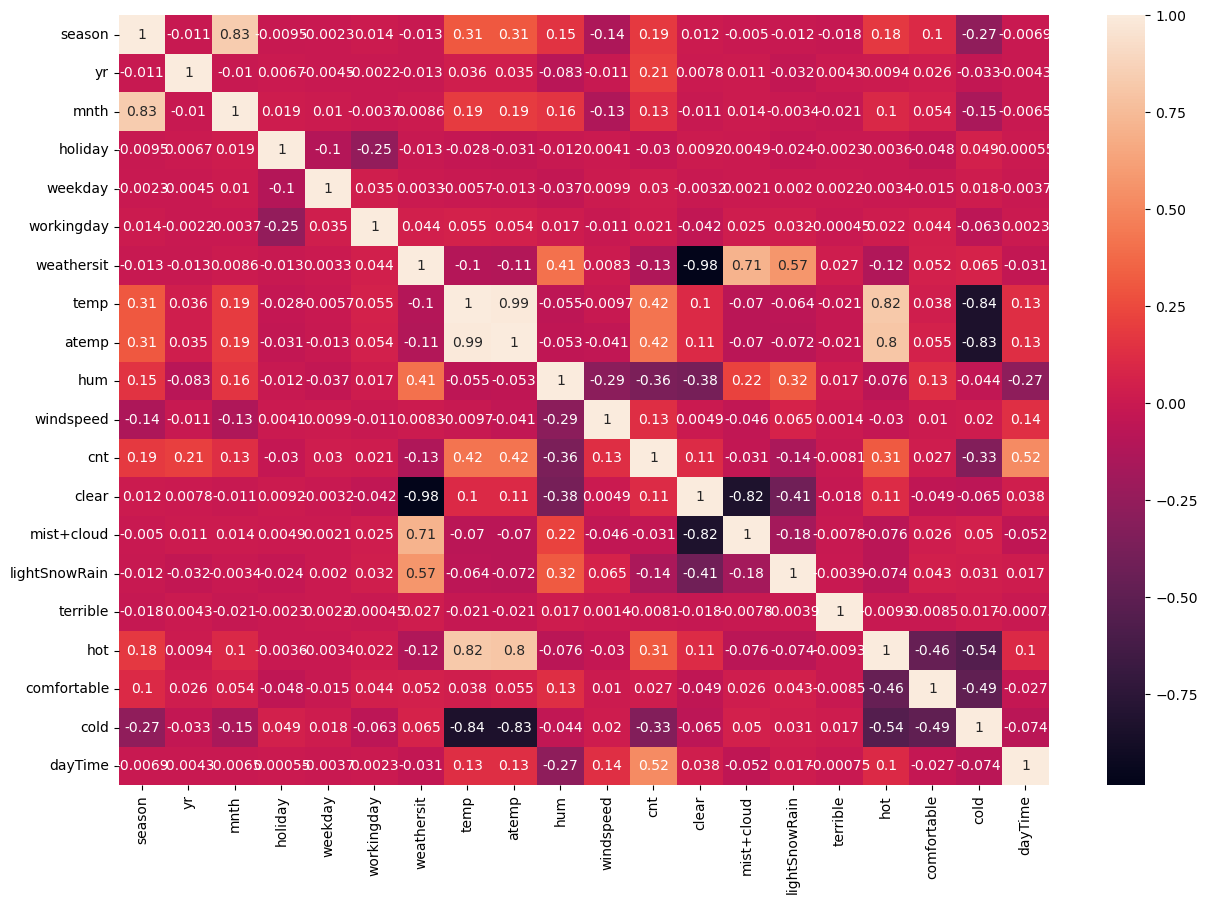

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method='spearman'),annot=True)
plt.show()

In [21]:
# Assign features to X 
X = data.drop('cnt', axis=1)
X

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,clear,mist+cloud,lightSnowRain,terrible,hot,comfortable,cold,dayTime
0,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0000,1,0,0,0,0,0,1,0
1,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0000,1,0,0,0,0,0,1,0
2,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0000,1,0,0,0,0,0,1,0
3,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0000,1,0,0,0,0,0,1,0
4,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0000,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,0,1,1,2,0.26,0.2576,0.60,0.1642,0,1,0,0,0,0,1,3
17375,1,1,12,0,1,1,2,0.26,0.2576,0.60,0.1642,0,1,0,0,0,0,1,3
17376,1,1,12,0,1,1,1,0.26,0.2576,0.60,0.1642,1,0,0,0,0,0,1,3
17377,1,1,12,0,1,1,1,0.26,0.2727,0.56,0.1343,1,0,0,0,0,0,1,3


In [22]:

# Normalise the features to use zero mean normalisation
# only for the first 10 features, but try yourself to visualise more features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['cnt'] = le.fit_transform(data['cnt'])
y = data['cnt']

### Divide data into training set and test set

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Linear Regression

### Ordinary Least Squares

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

### model score

In [26]:
reg.score(X_train,y_train)

0.3848298530057118

### 模型系数

In [27]:
reg.coef_

array([ 1.98244507e+01,  3.84545044e+01,  2.01507554e+00, -4.32552957e+00,
        3.47042627e+00,  1.41591552e+00,  1.13696839e+13, -4.79867943e+00,
        4.76213698e+01, -4.09885537e+01,  5.95414559e+00, -2.48973697e+13,
       -3.08571259e+13, -2.40982068e+13, -1.38977566e+12, -3.15448660e+13,
       -3.04451741e+13, -3.22463798e+13,  5.01424982e+01])

In [28]:
predictions = reg.predict(X_test)
np.set_printoptions(suppress=True)
print("prediction: ", np.round(predictions)[:10])
print("      real: ", y_test[:10])

prediction:  [195. 102. 134. 243. 215. 186. 260. 104. 173. 213.]
      real:  15652    388
3085     145
1684     151
10555    187
14622     61
1915     132
13947    694
227      154
15950    356
3471     417
Name: cnt, dtype: int64


In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, X, y, scoring='neg_mean_squared_error', cv=5)
scores

array([-10346.23155604, -16579.50534744, -13602.38653813, -32131.1251548 ,
       -32418.20850175])

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
mse = mean_squared_error(y_test, predictions)
print("MSE", mse)

MSE 20465.981129624142


In [32]:
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

RMSE:  143.05936225785484


In [33]:
r2 = r2_score(y_test, predictions)
print("R2:", r2)

R2: 0.39080227038919924


### Ridge regression

In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.5)
ridge.fit(X_train,y_train)
print(ridge.coef_)
print(ridge.intercept_)

[ 19.80709318  38.44434249   2.02509284  -4.31608914   3.47862009
   1.41278352  -1.00545064  -4.708578    47.51478991 -40.97653436
   5.96183761  -1.59116535   4.91730504  -5.15769639   0.53354585
   6.86006361   2.05157389  -8.64780212  50.13394376]
187.08595616400316


Font 'default' does not have a glyph for '\u6b63' [U+6b63], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5219' [U+5219], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5316' [U+5316], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u9879' [U+9879], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u53c2' [U+53c2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6570' [U+6570], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u548c' [U+548c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u56de' [U+56de], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5f52' [U+5f52], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u7cfb' [U+7cfb], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u5cad' [U+5cad], 

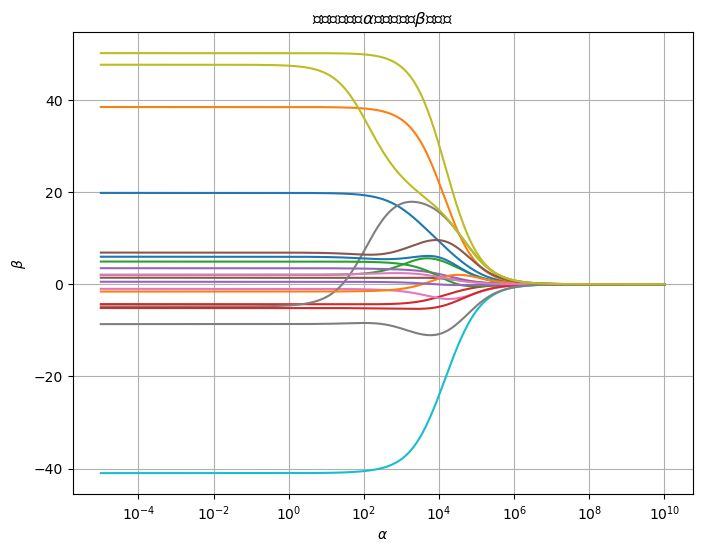

In [35]:
#设置参数以及训练模型
alphas = 10**np.linspace(-5, 10, 500)
betas = []
for alpha in alphas:
    rd = Ridge(alpha = alpha)
    rd.fit(X_train, y_train)
    betas.append(rd.coef_)
#绘制岭迹图
plt.figure(figsize=(8,6))
plt.plot(alphas, betas)
#对数据进行对数转换, 便于观察.
plt.xscale('log')
#添加网格线
plt.grid(True)
#坐标轴适应数据量
plt.axis('tight')
plt.title(r'正则化项参数$\alpha$和回归系数$\beta$岭迹图')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()

In [36]:
from sklearn.linear_model import RidgeCV
from sklearn import metrics
ridge_cv = RidgeCV(alphas = alphas, cv =10, scoring='r2')
ridge_cv.fit(X_train,y_train)
ridge_cv.alpha_

20.541173483530642

In [37]:
rd = Ridge(alpha=0.4563716281924754) #, fit_intercept=False
rd.fit(X_train, y_train)
print(rd.coef_)
print(rd.intercept_)

[ 19.8073296   38.44449368   2.02496883  -4.3160564    3.47868745
   1.41281248  -1.00539278  -4.71813494  47.52377129 -40.97677771
   5.96215921  -1.59121606   4.91733089  -5.15765071   0.53356143
   6.86052157   2.05141603  -8.64810107  50.13404162]
187.08596180955004


In [38]:
ridgeScores = cross_val_score(rd, X, y, cv=5)
ridgeScores

array([0.14119289, 0.25713181, 0.19058499, 0.29352661, 0.30932853])

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
ridgePredictions = rd.predict(X_test)
mse = mean_squared_error(y_test, ridgePredictions)
print("MSE", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
score = rd.score(X,y)
print(score)

MSE 20466.496765250144
RMSE:  143.06116442015332
R2: 0.39080227038919924
0.38677518609524975


<function matplotlib.pyplot.show(close=None, block=None)>

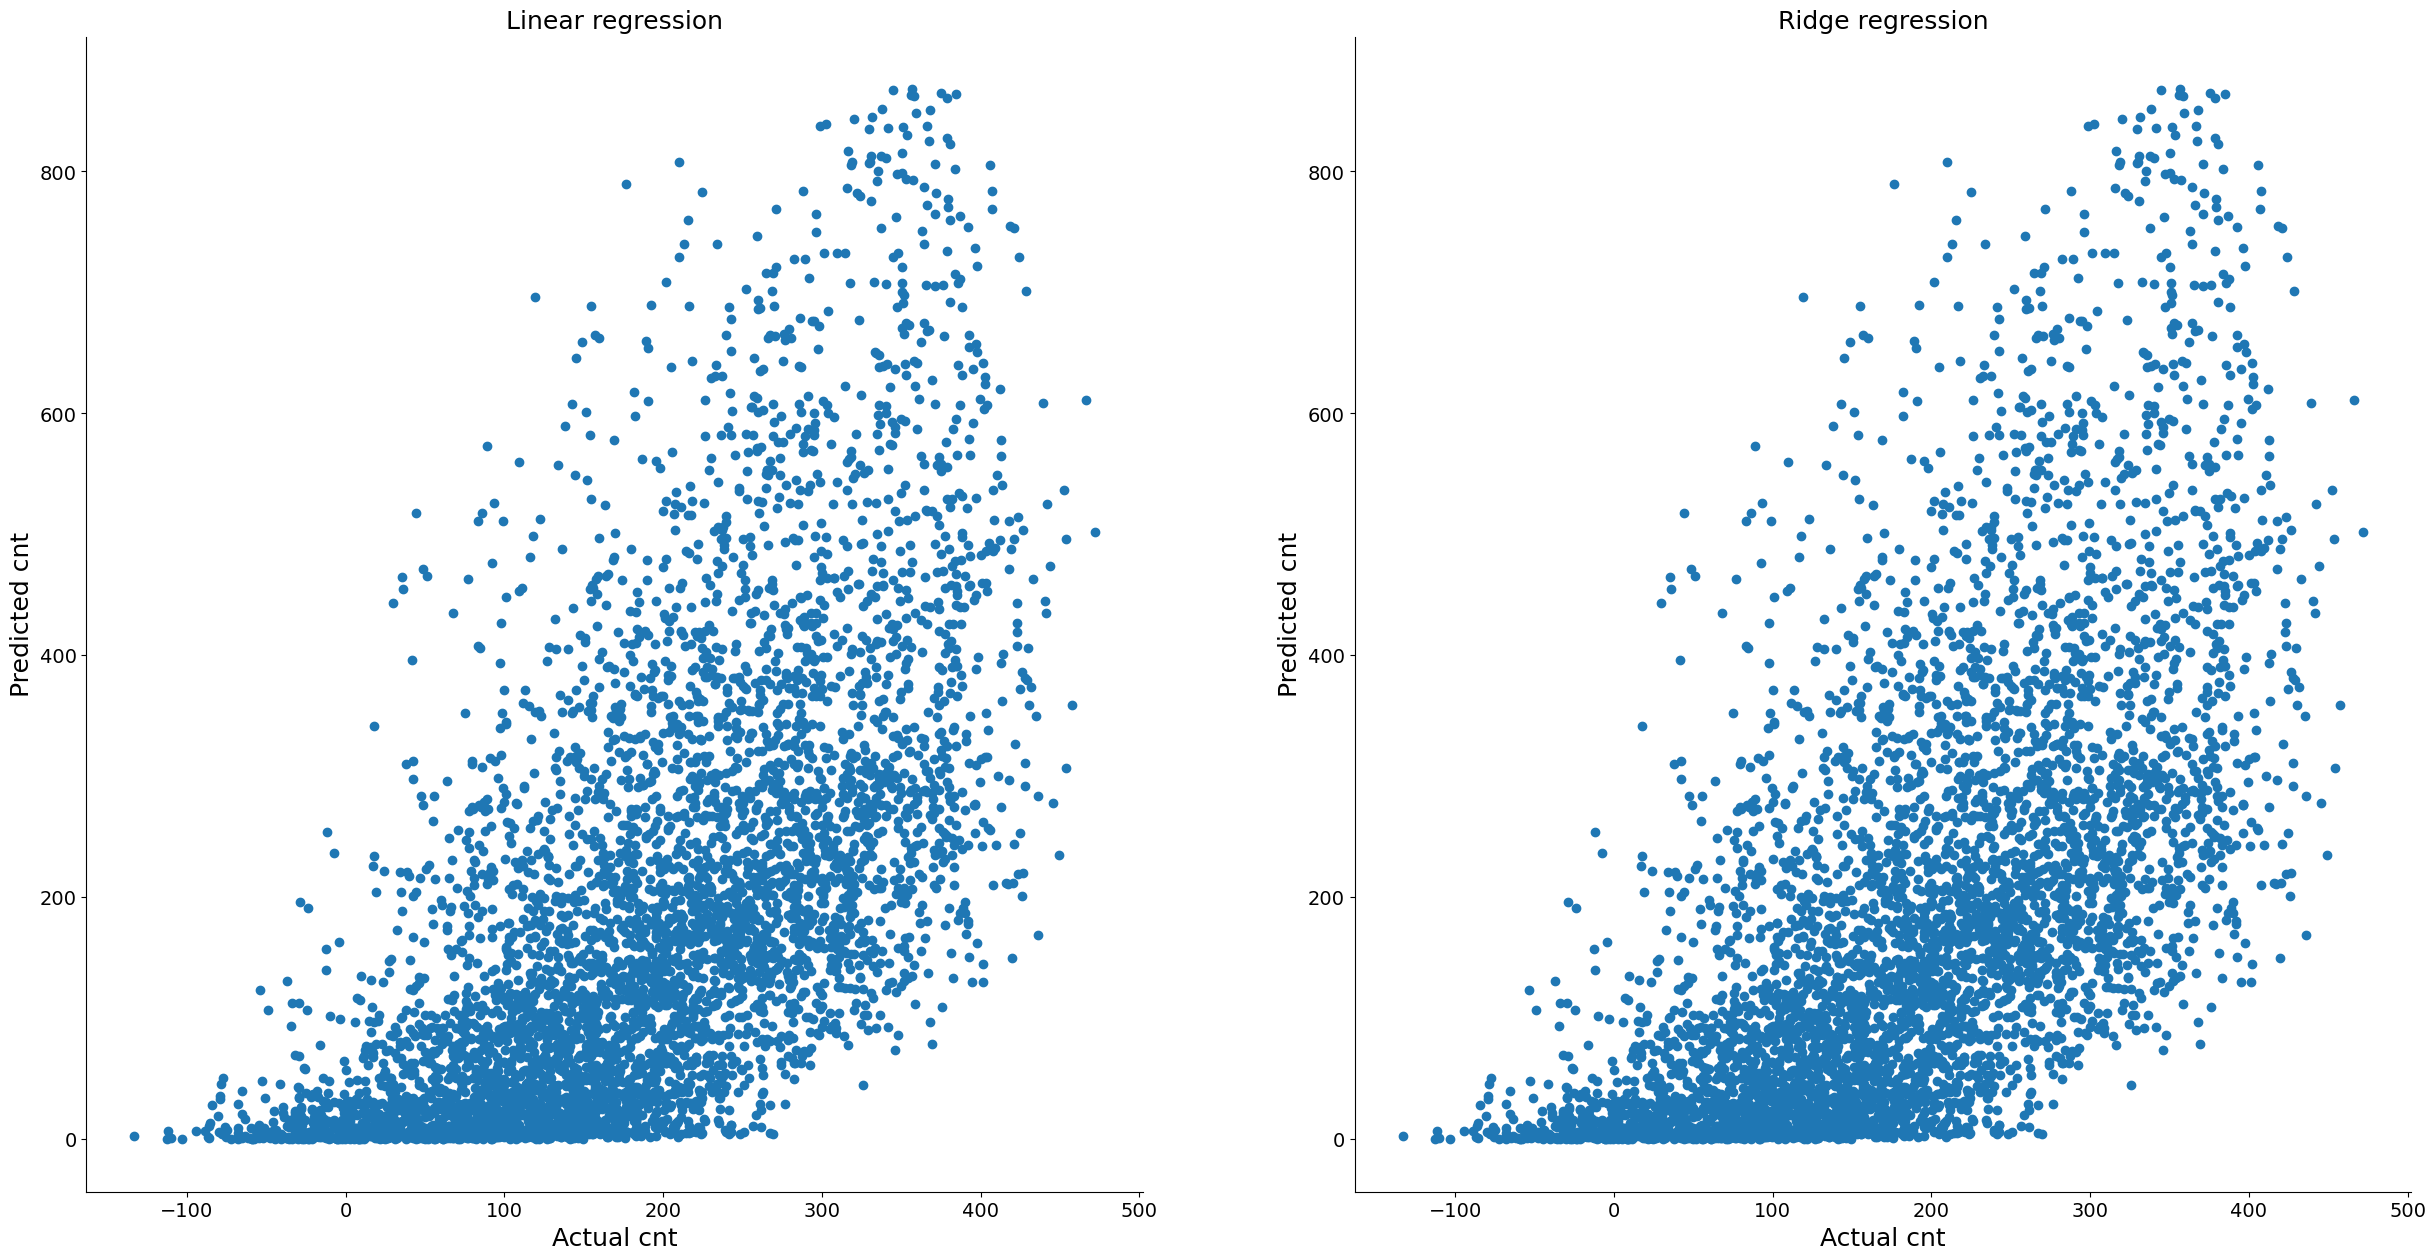

In [40]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(30,15))

ax1.scatter(predictions, y_test)
ax1.set_title("Linear regression", fontsize = '18')
ax1.set_xlabel("Actual cnt", fontsize = '18')
ax1.set_ylabel("Predicted cnt", fontsize = '18')
ax1.tick_params(labelsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2.scatter(ridgePredictions, y_test)
ax2.set_title("Ridge regression", fontsize = '18')
ax2.set_xlabel("Actual cnt", fontsize = '18')
ax2.set_ylabel("Predicted cnt", fontsize = '18')
ax2.tick_params(labelsize=14)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show

# Support Vector Machines

In [41]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [42]:
## Linear Kernel

In [43]:
clf = svm.SVC(kernel='linear', C=float('inf'))
clf.fit(X_train, y_train)
predict_y = clf.predict(X_test)

In [ ]:


score = cross_val_score(svm.SVC(), X, y, scoring='neg_mean_squared_error', cv=5)


c:\ProgramData\Anaconda3\envs\mle_tf\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [ ]:
print(np.average(score))

-27692.51720833597


In [ ]:
"""
kf = KFold(n_splits=4)
kf.get_n_splits(X)
clf = svm.SVC()
mse = []
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    clf.fit(X_train, y_train)
    predict_y = clf.predict(X_test)
    mse.append(mean_squared_error(y_test, predict_y))
print(np.average(mse))
    """

# Decision Tree

In [ ]:
from sklearn import tree

score = cross_val_score(tree.DecisionTreeRegressor(), X, y, scoring='neg_mean_squared_error', cv=10)


In [ ]:

print(np.average(score))

-27660.498159858143


# Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline

###regr = make_pipeline(StandardScaler(),MLPRegressor(hidden_layer_sizes=(100, 100), random_state=1,max_iter=10)).fit(X_train,y_train)
 
#prediction = regr.predict(X_test)
#regr.score(X_test, y_test)
score = cross_val_score(MLPRegressor(hidden_layer_sizes=(100, 100), random_state=1,max_iter=1000), X, y, scoring='neg_mean_squared_error', cv=5)

c:\ProgramData\Anaconda3\envs\mle_tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\ProgramData\Anaconda3\envs\mle_tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\ProgramData\Anaconda3\envs\mle_tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
print(np.average(score))

-14157.112650432417


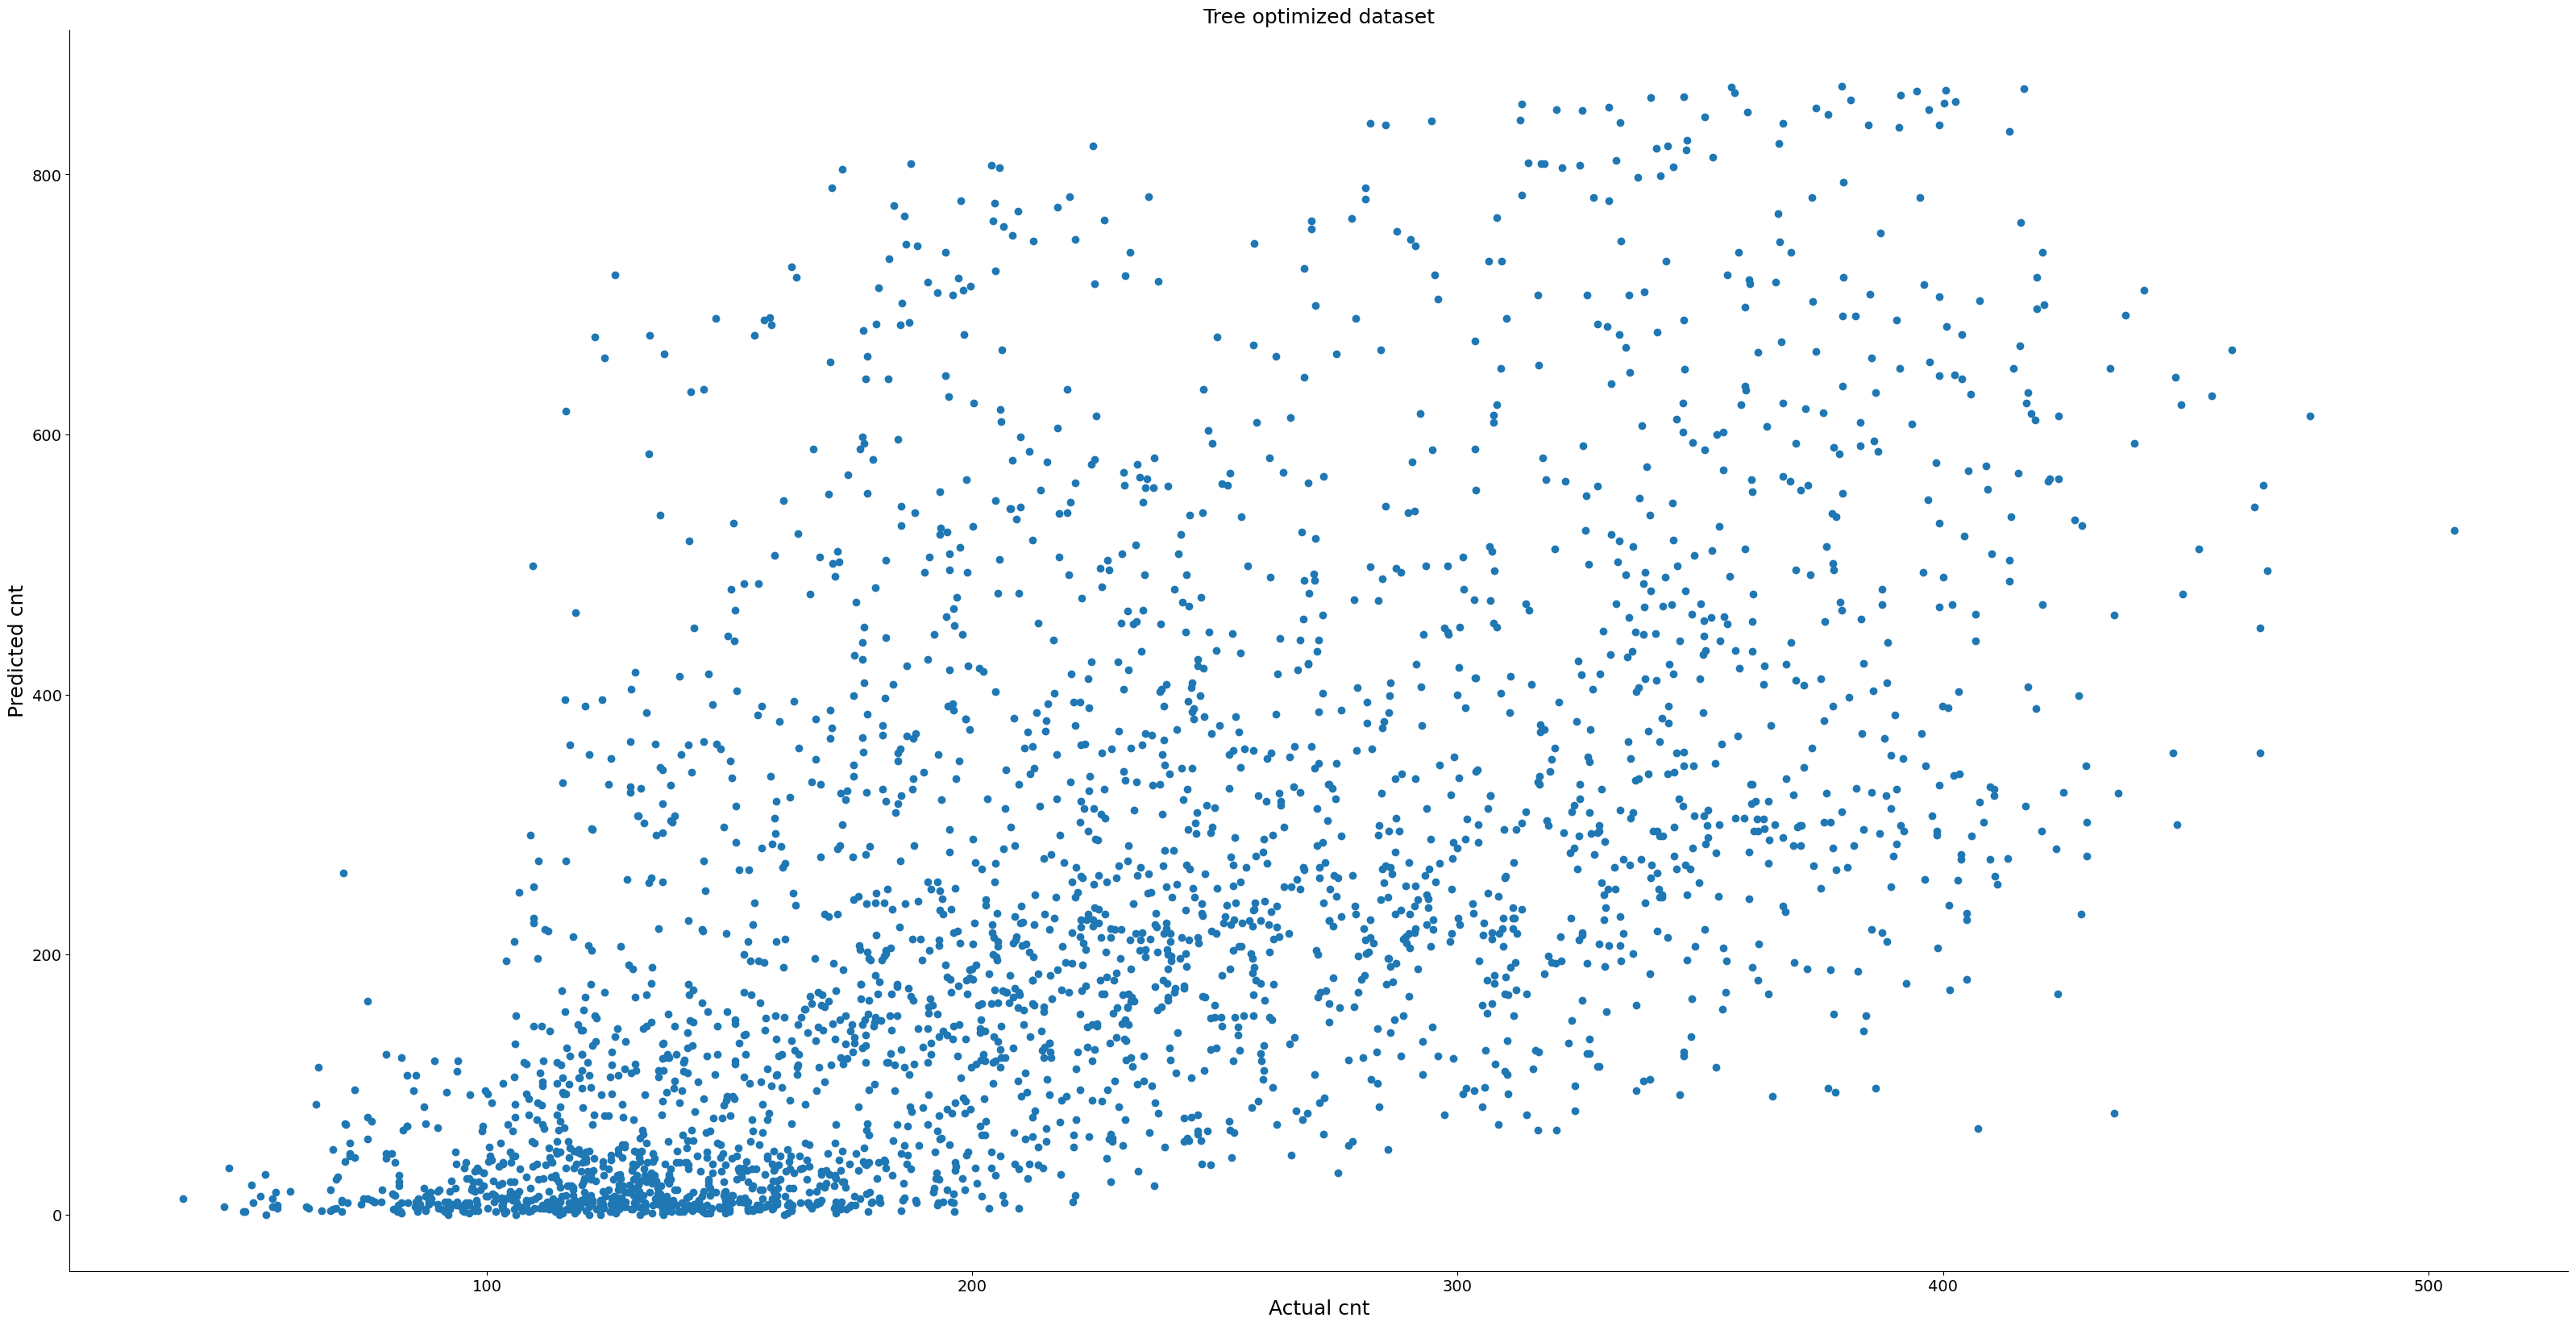

In [ ]:
fig, (ax1) = plt.subplots(1,figsize=(40,20))

ax1.scatter(prediction, y_test)
ax1.set_title("Tree optimized dataset", fontsize = '18')
ax1.set_xlabel("Actual cnt", fontsize = '18')
ax1.set_ylabel("Predicted cnt", fontsize = '18')
ax1.tick_params(labelsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)